<a href="https://colab.research.google.com/github/IMI1998/Number-Sequence/blob/main/Predict_words.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [23]:
data = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]
print(data)

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [25]:
def splitSequence(seq, n_steps):

    X = []
    y = []

    for i in range(len(seq)):

        lastIndex = i + n_steps


        if lastIndex > len(seq) - 1:
            break


        seq_X, seq_y = seq[i:lastIndex], seq[lastIndex]


        X.append(seq_X)
        y.append(seq_y)
        pass

    X = np.array(X)
    y = np.array(y)

    return X,y

In [26]:
n_steps = 7
X, y = splitSequence(data, n_steps)
print(X)

[[ 10  20  30  40  50  60  70]
 [ 20  30  40  50  60  70  80]
 [ 30  40  50  60  70  80  90]
 [ 40  50  60  70  80  90 100]
 [ 50  60  70  80  90 100 110]
 [ 60  70  80  90 100 110 120]
 [ 70  80  90 100 110 120 130]
 [ 80  90 100 110 120 130 140]
 [ 90 100 110 120 130 140 150]
 [100 110 120 130 140 150 160]
 [110 120 130 140 150 160 170]
 [120 130 140 150 160 170 180]
 [130 140 150 160 170 180 190]]


In [27]:
n_features = 1
X = X.reshape((X.shape[0], X.shape[1], n_features))
print(X[:2])

[[[10]
  [20]
  [30]
  [40]
  [50]
  [60]
  [70]]

 [[20]
  [30]
  [40]
  [50]
  [60]
  [70]
  [80]]]


In [28]:
model = tf.keras.Sequential()
model.add(layers.LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(layers.Dense(1))

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss=tf.keras.losses.MeanSquaredError())

In [31]:
print("Fit model on training data")
history = model.fit(
    X_train,
    y_train,
    batch_size=64,
    epochs=100,
    validation_data=(X_test, y_test), verbose=1
)

Fit model on training data
Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 17964.6504 - val_loss: 19783.3457
Epoch 2/100
1/1 [==============================] - 0s 75ms/step - loss: 17521.6113 - val_loss: 19233.6406
Epoch 3/100
1/1 [==============================] - 0s 77ms/step - loss: 17115.8750 - val_loss: 18751.6191
Epoch 4/100
1/1 [==============================] - 0s 53ms/step - loss: 16731.1387 - val_loss: 18324.0176
Epoch 5/100
1/1 [==============================] - 0s 53ms/step - loss: 16357.3223 - val_loss: 17916.7070
Epoch 6/100
1/1 [==============================] - 0s 78ms/step - loss: 15980.5654 - val_loss: 17464.0527
Epoch 7/100
1/1 [==============================] - 0s 75ms/step - loss: 15579.9902 - val_loss: 16914.2559
Epoch 8/100
1/1 [==============================] - 0s 83ms/step - loss: 15139.5215 - val_loss: 16275.2725
Epoch 9/100
1/1 [==============================] - 0s 60ms/step - loss: 14663.3174 - val_loss: 15661.4717
Epoch 10/100
1/1 [===

In [32]:

test_data = np.array([90, 100, 110, 120, 130, 140, 150])
test_data = test_data.reshape((1, n_steps, n_features))
test_data

array([[[ 90],
        [100],
        [110],
        [120],
        [130],
        [140],
        [150]]])

In [33]:
predictNextNumber = model.predict(test_data, verbose=1)
print(predictNextNumber)

1/1 [==============================] - 0s 228ms/step
[[158.28178]]


In [34]:
model.save("drive/MyDrive/Dataset/DataScience-Pianalytix-Models/NumberSequence.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


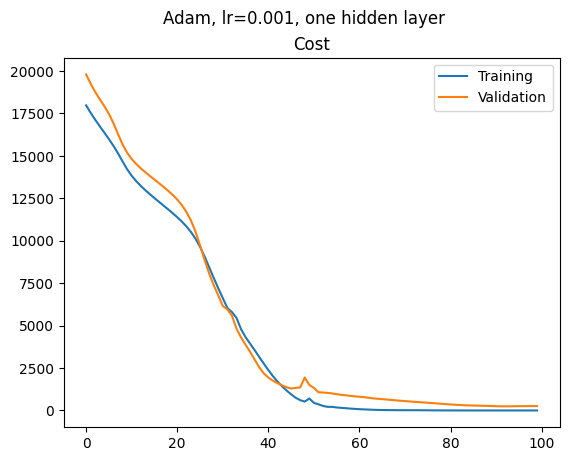

In [35]:
fig = plt.figure()
fig.suptitle("Adam, lr=0.001, one hidden layer")

ax = fig.add_subplot(1,1, 1)
ax.set_title('Cost')
ax.plot(history.history['loss'], label='Training')
ax.plot(history.history['val_loss'], label='Validation')
ax.legend()

fig.show()